In [1]:
import pandas as pd
import numpy as np
from itertools import combinations
import geopandas as gpd
from shapely.geometry import Point, LineString
import matplotlib.pyplot as plt
import contextily as ctx

ruta_base = ''
ruta_archivo = ruta_base + 'df_fechas.parquet'  
#ruta_archivo = ruta_base + 'dataset_combinado_final.parquet'  

df = pd.read_parquet(ruta_archivo)

df['coord_id'] = df['LATITUD'].astype(str) + "_" + df['LONGITUD'].astype(str)
estaciones_por_momento = df.groupby('time')['coord_id'].nunique()
# Filtrar fechas donde el conteo de estaciones únicas no es igual a 512
fechas_con_menos_de_512_momentos = estaciones_por_momento[estaciones_por_momento != 31]

# Visualizar el resultado
print(fechas_con_menos_de_512_momentos)

# Contar cuántas fechas únicas hay en el dataset
numero_de_fechas_unicas = df['time'].nunique()

# Visualizar el resultado
print(f"El número de fechas únicas en el dataset es: {numero_de_fechas_unicas}")


Series([], Name: coord_id, dtype: int64)
El número de fechas únicas en el dataset es: 7772


In [2]:
df

,LONGITUD,LATITUD,ALTITUD,periodo_D,periodo_N,time,LAeq,L1,L10,L50,L90,L99,day,is_holiday,is_weekend,coord_id
0,-3.777830,40.375250,678,0,1,2014-01-01 00:00:00,68.9,75.8,69.5,57.9,43.3,39.7,2014-01-01,1,0,40.37525_-3.77783
1,-3.777830,40.375250,678,1,0,2014-01-01 12:00:00,66.6,75.5,71.2,59.8,46.8,44.1,2014-01-01,1,0,40.37525_-3.77783
2,-3.777830,40.375250,678,0,1,2014-01-02 00:00:00,61.1,73.3,64.4,50.3,43.4,41.0,2014-01-02,1,0,40.37525_-3.77783
3,-3.777830,40.375250,678,1,0,2014-01-02 12:00:00,69.8,76.7,74.0,67.0,57.4,52.0,2014-01-02,1,0,40.37525_-3.77783
4,-3.777830,40.375250,678,0,1,2014-01-03 00:00:00,61.1,72.6,64.8,52.4,46.3,43.4,2014-01-03,0,0,40.37525_-3.77783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240927,-3.580101,40.476929,627,1,0,2024-08-23 12:00:00,65.2,77.9,64.7,51.9,44.5,42.1,2024-08-23,0,0,40.476929_-3.580101
240928,-3.580101,40.476929,627,0,1,2024-08-24 00:00:00,53.6,65.1,55.8,46.5,38.8,35.6,2024-08-24,0,1,40.476929_-3.580101
240929,-3.580101,40.476929,627,1,0,2024-08-24 12:00:00,57.3,68.4,60.6,48.8,43.6,41.1,2024-08-24,0,1,40.476929_-3.580101
240930,-3.580101,40.476929,627,0,1,2024-08-25 00:00:00,53.9,65.1,56.2,49.1,41.5,38.2,2024-08-25,0,1,40.476929_-3.580101


In [3]:
# Quitar las filas correspondientes a los años del COVID (2020, 2021)
df = df[~df['time'].dt.year.isin([2020, 2021])]
df.reset_index(drop=True, inplace=True)

# Mostrar el DataFrame resultante
df


,LONGITUD,LATITUD,ALTITUD,periodo_D,periodo_N,time,LAeq,L1,L10,L50,L90,L99,day,is_holiday,is_weekend,coord_id
0,-3.777830,40.375250,678,0,1,2014-01-01 00:00:00,68.9,75.8,69.5,57.9,43.3,39.7,2014-01-01,1,0,40.37525_-3.77783
1,-3.777830,40.375250,678,1,0,2014-01-01 12:00:00,66.6,75.5,71.2,59.8,46.8,44.1,2014-01-01,1,0,40.37525_-3.77783
2,-3.777830,40.375250,678,0,1,2014-01-02 00:00:00,61.1,73.3,64.4,50.3,43.4,41.0,2014-01-02,1,0,40.37525_-3.77783
3,-3.777830,40.375250,678,1,0,2014-01-02 12:00:00,69.8,76.7,74.0,67.0,57.4,52.0,2014-01-02,1,0,40.37525_-3.77783
4,-3.777830,40.375250,678,0,1,2014-01-03 00:00:00,61.1,72.6,64.8,52.4,46.3,43.4,2014-01-03,0,0,40.37525_-3.77783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195605,-3.580101,40.476929,627,1,0,2024-08-23 12:00:00,65.2,77.9,64.7,51.9,44.5,42.1,2024-08-23,0,0,40.476929_-3.580101
195606,-3.580101,40.476929,627,0,1,2024-08-24 00:00:00,53.6,65.1,55.8,46.5,38.8,35.6,2024-08-24,0,1,40.476929_-3.580101
195607,-3.580101,40.476929,627,1,0,2024-08-24 12:00:00,57.3,68.4,60.6,48.8,43.6,41.1,2024-08-24,0,1,40.476929_-3.580101
195608,-3.580101,40.476929,627,0,1,2024-08-25 00:00:00,53.9,65.1,56.2,49.1,41.5,38.2,2024-08-25,0,1,40.476929_-3.580101


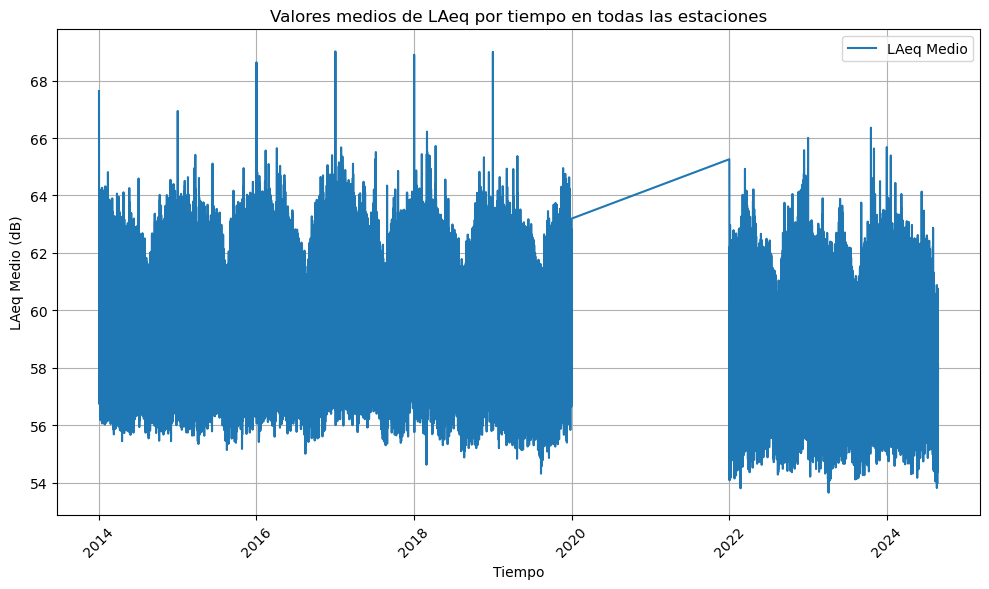

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Seleccionar solo las columnas numéricas antes de agrupar
df_numeric = df.select_dtypes(include=['number'])

# Agrupar los datos por 'time' y calcular los valores medios para todas las estaciones (solo columnas numéricas)
df_avg = df_numeric.groupby(df['time']).mean()

# Graficar los valores medios de LAeq (o cualquier otra variable numérica que desees visualizar) a lo largo del tiempo
plt.figure(figsize=(10, 6))
plt.plot(df_avg.index, df_avg['LAeq'], label='LAeq Medio')

# Añadir etiquetas y título
plt.xlabel('Tiempo')
plt.ylabel('LAeq Medio (dB)')
plt.title('Valores medios de LAeq por tiempo en todas las estaciones')
plt.legend()

# Mostrar el gráfico
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [5]:
import pandas as pd
import numpy as np
from itertools import combinations
import geopandas as gpd
from shapely.geometry import Point, LineString
import matplotlib.pyplot as plt
import contextily as ctx

specific_time_ds = df[df['time'] == "2014-01-01 00:00:00"].reset_index(drop=True)
specific_time_ds.to_parquet('specific_time.parquet')

In [6]:
df.columns

Index(['LONGITUD', 'LATITUD', 'ALTITUD', 'periodo_D', 'periodo_N', 'time',
       'LAeq', 'L1', 'L10', 'L50', 'L90', 'L99', 'day', 'is_holiday',
       'is_weekend', 'coord_id'],
      dtype='object')

In [7]:
import torch
import pandas as pd

ruta_parquet = "edges.parquet"

# Carga el archivo Parquet en un DataFrame de pandas
edges = pd.read_parquet(ruta_parquet)
print(edges)
# Crear mapeo de coordenadas a índices únicos
coordenadas = edges[['LATITUD', 'LONGITUD']].drop_duplicates().reset_index(drop=True)
coordenadas['node_index'] = coordenadas.index

# Mapeo inverso para encontrar índices basados en coordenadas
index_map = {tuple(row): i for i, row in coordenadas[['LATITUD', 'LONGITUD']].iterrows()}

# Inicializar listas para edge_index y edge_attr, y un conjunto para verificar duplicados
source_nodes = []
target_nodes = []
distances = []
edges_added = set()

# Llenar las listas con información de edges
for _, row in edges.iterrows():
    source_index = index_map[(row['LATITUD'], row['LONGITUD'])]
    for i, target_coord in enumerate(row['Closest_Coords']):
        target_index = index_map[tuple(target_coord)]
        dist = row['Distances'][i]
        
        # Ordenar los índices para asegurar consistencia (grafo no dirigido)
        edge = tuple(sorted([source_index, target_index]))
        
        # Verificar si la arista ya fue agregada
        if edge not in edges_added:
            source_nodes.append(edge[0])
            target_nodes.append(edge[1])
            distances.append(dist)
            edges_added.add(edge)

# Convertir listas a tensores de PyTorch
edge_index = torch.tensor([source_nodes, target_nodes], dtype=torch.long)
edge_attr = torch.tensor(distances, dtype=torch.float).view(-1, 1)

      LATITUD  LONGITUD                                     Closest_Coords  \
0   40.375250 -3.777830  [[40.407871, -3.74195], [40.384978, -3.718807]...   
1   40.517989 -3.774551  [[40.500598, -3.689643], [40.465628, -3.688719...   
2   40.419390 -3.747319  [[40.424005, -3.712253], [40.394788, -3.731786...   
3   40.407871 -3.741950  [[40.394788, -3.731786], [40.424005, -3.712253...   
4   40.394788 -3.731786  [[40.407871, -3.74195], [40.41939, -3.747319],...   
5   40.384978 -3.718807  [[40.398022, -3.686808], [40.407871, -3.74195]...   
6   40.347100 -3.713312  [[40.394788, -3.731786], [40.398022, -3.686808...   
7   40.424005 -3.712253  [[40.422599, -3.691877], [40.437548, -3.690758...   
8   40.478197 -3.711543  [[40.500598, -3.689643], [40.445581, -3.707157...   
9   40.445581 -3.707157  [[40.437548, -3.690758], [40.424005, -3.712253...   
10  40.419251 -3.703175  [[40.422599, -3.691877], [40.409121, -3.691509...   
11  40.422599 -3.691877  [[40.419251, -3.703175], [40.409121, -3

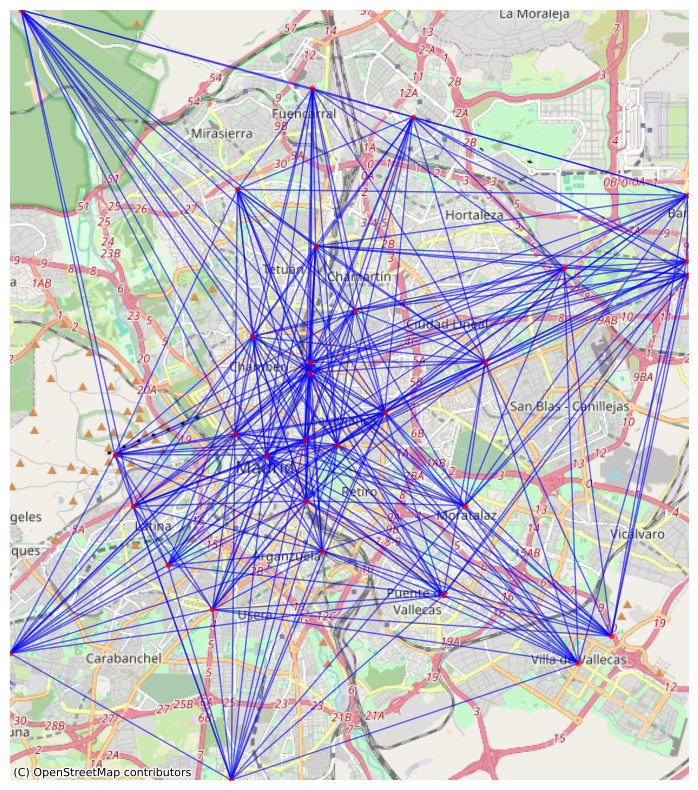

In [8]:
import matplotlib.pyplot as plt
import networkx as nx
import geopandas as gpd
import contextily as ctx
from shapely.geometry import Point

# Supongamos que 'coordenadas' es tu DataFrame con las columnas 'LATITUD' y 'LONGITUD'
# Convertir el DataFrame a un GeoDataFrame
geometry = [Point(xy) for xy in zip(coordenadas['LONGITUD'], coordenadas['LATITUD'])]
gdf = gpd.GeoDataFrame(coordenadas, geometry=geometry)

# Definir el sistema de coordenadas (CRS) WGS84
gdf.set_crs(epsg=4326, inplace=True)

# Convertir a CRS compatible con contextily (Web Mercator)
gdf = gdf.to_crs(epsg=3857)

# Crear el grafo
G = nx.Graph()

# Iterar sobre las listas source_nodes y target_nodes para agregar nodos y aristas
for source_node, target_node in zip(source_nodes, target_nodes):
    # Obtener las coordenadas de los nodos de origen y destino
    source_coord = gdf.loc[source_node].geometry
    target_coord = gdf.loc[target_node].geometry

    # Agregar los nodos al grafo con su posición
    G.add_node(source_node, pos=(source_coord.x, source_coord.y))
    G.add_node(target_node, pos=(target_coord.x, target_coord.y))

    # Agregar la arista entre los nodos
    G.add_edge(source_node, target_node)

# Obtener posiciones de los nodos
pos = nx.get_node_attributes(G, 'pos')

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(10, 10))

# Dibujar el grafo sobre el mapa
nx.draw(G, pos, ax=ax, node_size=10, node_color='red', edge_color='blue', with_labels=False, alpha=0.6)

# Añadir el mapa base usando OpenStreetMap y centrar en Madrid
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik, zoom=12)

# Fijar los límites del mapa alrededor de Madrid
ax.set_xlim(gdf.total_bounds[0], gdf.total_bounds[2])
ax.set_ylim(gdf.total_bounds[1], gdf.total_bounds[3])

# Ocultar los ejes
ax.set_axis_off()

# Mostrar el mapa con el grafo
plt.show()


In [9]:
df.columns

Index(['LONGITUD', 'LATITUD', 'ALTITUD', 'periodo_D', 'periodo_N', 'time',
       'LAeq', 'L1', 'L10', 'L50', 'L90', 'L99', 'day', 'is_holiday',
       'is_weekend', 'coord_id'],
      dtype='object')

In [10]:
df

,LONGITUD,LATITUD,ALTITUD,periodo_D,periodo_N,time,LAeq,L1,L10,L50,L90,L99,day,is_holiday,is_weekend,coord_id
0,-3.777830,40.375250,678,0,1,2014-01-01 00:00:00,68.9,75.8,69.5,57.9,43.3,39.7,2014-01-01,1,0,40.37525_-3.77783
1,-3.777830,40.375250,678,1,0,2014-01-01 12:00:00,66.6,75.5,71.2,59.8,46.8,44.1,2014-01-01,1,0,40.37525_-3.77783
2,-3.777830,40.375250,678,0,1,2014-01-02 00:00:00,61.1,73.3,64.4,50.3,43.4,41.0,2014-01-02,1,0,40.37525_-3.77783
3,-3.777830,40.375250,678,1,0,2014-01-02 12:00:00,69.8,76.7,74.0,67.0,57.4,52.0,2014-01-02,1,0,40.37525_-3.77783
4,-3.777830,40.375250,678,0,1,2014-01-03 00:00:00,61.1,72.6,64.8,52.4,46.3,43.4,2014-01-03,0,0,40.37525_-3.77783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195605,-3.580101,40.476929,627,1,0,2024-08-23 12:00:00,65.2,77.9,64.7,51.9,44.5,42.1,2024-08-23,0,0,40.476929_-3.580101
195606,-3.580101,40.476929,627,0,1,2024-08-24 00:00:00,53.6,65.1,55.8,46.5,38.8,35.6,2024-08-24,0,1,40.476929_-3.580101
195607,-3.580101,40.476929,627,1,0,2024-08-24 12:00:00,57.3,68.4,60.6,48.8,43.6,41.1,2024-08-24,0,1,40.476929_-3.580101
195608,-3.580101,40.476929,627,0,1,2024-08-25 00:00:00,53.9,65.1,56.2,49.1,41.5,38.2,2024-08-25,0,1,40.476929_-3.580101


In [11]:
# Eliminar una columna específica
df.drop(columns=['day'], inplace=True)

C:\Users\marcs\AppData\Local\Temp\ipykernel_17844\1204475348.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['day'], inplace=True)


In [12]:
from sklearn.preprocessing import MinMaxScaler

# Crear un objeto MinMaxScaler para normalizar los datos
scaler = MinMaxScaler()

# Separar las columnas que no queremos normalizar
coordenadas = df[['LONGITUD', 'LATITUD']]

# Normalizar las coordenadas por separado
coordenadas_normalizadas = scaler.fit_transform(coordenadas)

# Crear nuevas columnas para las coordenadas normalizadas
df['LONGITUD_normalizada'] = coordenadas_normalizadas[:, 0]
df['LATITUD_normalizada'] = coordenadas_normalizadas[:, 1]

# Seleccionar las columnas que queremos normalizar (excluyendo LONGITUD, LATITUD, coord_id y time)
columnas_a_normalizar = df.drop(['LONGITUD', 'LATITUD', 'coord_id', 'time', 'LONGITUD_normalizada', 'LATITUD_normalizada'], axis=1)

# Aplicar la normalización al resto de las columnas
df[columnas_a_normalizar.columns] = scaler.fit_transform(columnas_a_normalizar)

# Mostrar las primeras filas del DataFrame para verificar los cambios
print(df.head())


   LONGITUD   LATITUD   ALTITUD  periodo_D  periodo_N                time  \
0  -3.77783  40.37525  0.606299        0.0        1.0 2014-01-01 00:00:00   
1  -3.77783  40.37525  0.606299        1.0        0.0 2014-01-01 12:00:00   
2  -3.77783  40.37525  0.606299        0.0        1.0 2014-01-02 00:00:00   
3  -3.77783  40.37525  0.606299        1.0        0.0 2014-01-02 12:00:00   
4  -3.77783  40.37525  0.606299        0.0        1.0 2014-01-03 00:00:00   

       LAeq        L1       L10       L50       L90       L99  is_holiday  \
0  0.520588  0.713076  0.730042  0.721945  0.539900  0.534320         1.0   
1  0.486765  0.710254  0.747899  0.745636  0.583541  0.593540         1.0   
2  0.405882  0.689558  0.676471  0.627182  0.541147  0.551817         1.0   
3  0.533824  0.721543  0.777311  0.835411  0.715711  0.699865         1.0   
4  0.405882  0.682973  0.680672  0.653367  0.577307  0.584118         0.0   

   is_weekend           coord_id  LONGITUD_normalizada  LATITUD_normalizad

C:\Users\marcs\AppData\Local\Temp\ipykernel_17844\1548831974.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['LONGITUD_normalizada'] = coordenadas_normalizadas[:, 0]
C:\Users\marcs\AppData\Local\Temp\ipykernel_17844\1548831974.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['LATITUD_normalizada'] = coordenadas_normalizadas[:, 1]
C:\Users\marcs\AppData\Local\Temp\ipykernel_17844\1548831974.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

In [13]:
def coord_id_to_tuple(coord_id):
    lat, lon = coord_id.split('_')
    return (float(lat), float(lon))

In [14]:
import pandas as pd
import numpy as np
import torch
from torch_geometric.data import Data

# Asumiendo que 'df' ya está definido y contiene tus datos
df.sort_values(by=['time', 'LATITUD', 'LONGITUD'], inplace=True)
features_columns_y = ['L1']
features_columns = [col for col in df.columns if col not in ['LONGITUD', 'LATITUD', 'time', 'coord_id', 'periodo_D']]
print(features_columns)
unique_times = sorted(df['time'].unique())

# Crear un índice de referencia con todas las estaciones únicas
all_stations = df['coord_id'].unique()

start_index = 6  # El primer índice que permite tener 6 pasos anteriores disponibles
end_index = len(unique_times) - 15  # Para asegurar 6 momentos futuros disponibles

for i in range(start_index, end_index + 1):
    # Selección de tiempos
    past_times = unique_times[i - 6:i]  # Selección de 6 tiempos pasados (exclusivo)
    current_time = [unique_times[i]]    # Tiempo actual
    future_times = unique_times[i + 1:i + 15]  # Selección de 6 tiempos futuros (exclusivo)

    # Filtrar datos para tiempos pasados y futuros
    current_snapshot = df[df['time'].isin(past_times + current_time)]
    future_snapshot = df[df['time'].isin(future_times)]
   
    # Pivotear y rellenar los datos para crear los tensores
    x_data = current_snapshot.pivot_table(index='coord_id', columns='time', values=features_columns).reindex(all_stations).fillna(0)

    # Ordenar los datos para asegurar la correspondencia correcta
    x_data = x_data.sort_index(key=lambda idx: idx.map(coord_id_to_tuple))
    #print(f' Las columnas tienen un formato:  { x_data.columns.tolist()}  ')

    # Asegurar que las coordenadas estén alineadas con el índice de referencia
    coordinates = df[['coord_id', 'LATITUD', 'LONGITUD']].drop_duplicates().set_index('coord_id').reindex(all_stations).fillna(0).values

    # Cambio de forma a [n_nodos, n_tiempo, n_características]
    n_nodes = len(all_stations)
    n_time_steps = 7  # 6 pasados + 1 actual
    n_features_per_time = len(features_columns)

    try:
        # Redimensionamos los datos para que cada nodo tenga una matriz [7, 13]
        x_tensor = x_data.values.reshape(n_nodes, n_time_steps, n_features_per_time)
    except ValueError as e:
        print(f'Snapshot {i} tiene un error de forma: {e}. Se omitirá.')
        continue

    # Tensor para y (futuro)
    y_data = future_snapshot.pivot_table(index='coord_id', columns='time', values=features_columns_y).reindex(all_stations).fillna(0)
    y_data = y_data.sort_index(key=lambda idx: idx.map(coord_id_to_tuple))

    if y_data.shape[1] == 14:
        y_flat = y_data.values.reshape(-1, 14 * len(features_columns_y))  # 6 futuros
    else:
        print(f'Snapshot {i} tiene un tamaño inesperado y se omitirá. y_data shape: {y_data.shape}')
        continue

    x_tensor = torch.tensor(x_tensor, dtype=torch.float)
    y_tensor = torch.tensor(y_flat, dtype=torch.float)
    coordinates_tensor = torch.tensor(coordinates, dtype=torch.float)

    # Crear y guardar el snapshot
    snapshot_data = Data(x=x_tensor, edge_index=edge_index, edge_attr=edge_attr, y=y_tensor, coordinates=coordinates_tensor)

    file_name = f'SnapshotsT/snapshot_{i}.pt'
    torch.save(snapshot_data, file_name)
    print(f'Snapshot {i} guardado como {file_name} con la forma {snapshot_data}.')



C:\Users\marcs\AppData\Local\Temp\ipykernel_17844\1000987350.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values(by=['time', 'LATITUD', 'LONGITUD'], inplace=True)


['ALTITUD', 'periodo_N', 'LAeq', 'L1', 'L10', 'L50', 'L90', 'L99', 'is_holiday', 'is_weekend', 'LONGITUD_normalizada', 'LATITUD_normalizada']
Snapshot 6 guardado como SnapshotsT/snapshot_6.pt con la forma Data(x=[31, 7, 12], edge_index=[2, 293], edge_attr=[293, 1], y=[31, 14], coordinates=[31, 2]).
Snapshot 7 guardado como SnapshotsT/snapshot_7.pt con la forma Data(x=[31, 7, 12], edge_index=[2, 293], edge_attr=[293, 1], y=[31, 14], coordinates=[31, 2]).
Snapshot 8 guardado como SnapshotsT/snapshot_8.pt con la forma Data(x=[31, 7, 12], edge_index=[2, 293], edge_attr=[293, 1], y=[31, 14], coordinates=[31, 2]).
Snapshot 9 guardado como SnapshotsT/snapshot_9.pt con la forma Data(x=[31, 7, 12], edge_index=[2, 293], edge_attr=[293, 1], y=[31, 14], coordinates=[31, 2]).
Snapshot 10 guardado como SnapshotsT/snapshot_10.pt con la forma Data(x=[31, 7, 12], edge_index=[2, 293], edge_attr=[293, 1], y=[31, 14], coordinates=[31, 2]).
Snapshot 11 guardado como SnapshotsT/snapshot_11.pt con la forma D

C:\Users\marcs\AppData\Local\Temp\ipykernel_17844\1249013810.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
C:\Users\marcs\AppData\Local\Temp\ipykernel_17844\1249013810.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado.sort_values(by=['time', 'LATITUD', 'LONGITUD'], inplace=True)


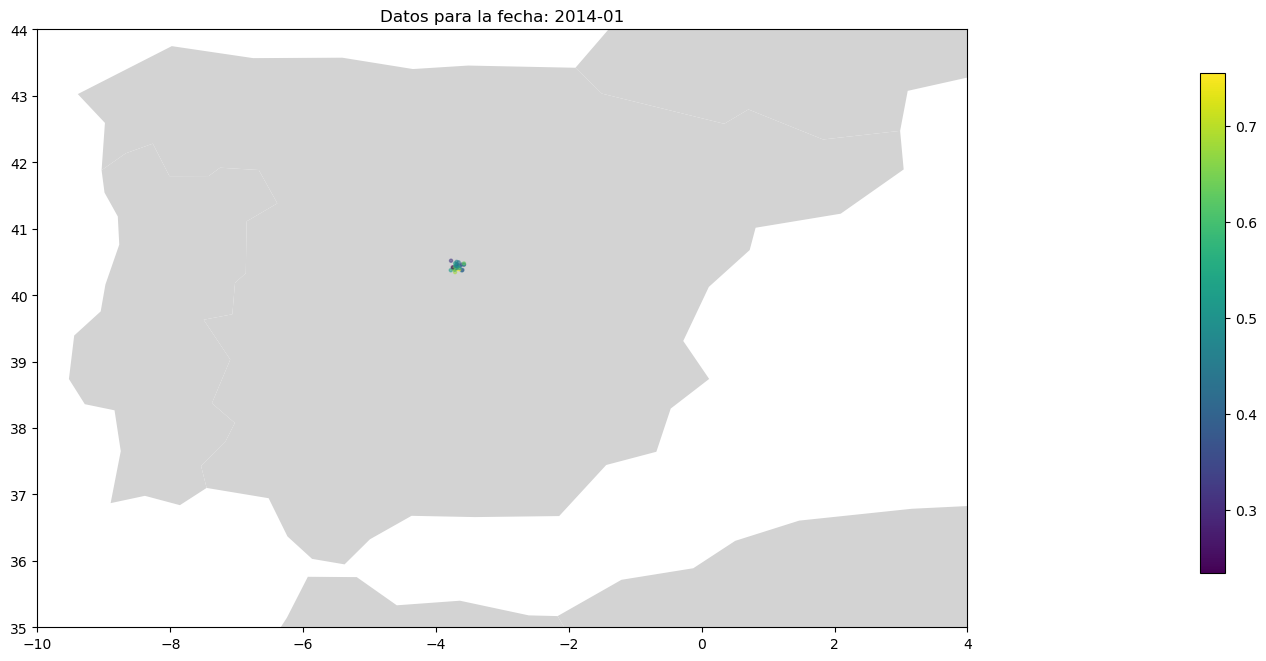

C:\Users\marcs\AppData\Local\Temp\ipykernel_17844\1249013810.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado.sort_values(by=['time', 'LATITUD', 'LONGITUD'], inplace=True)


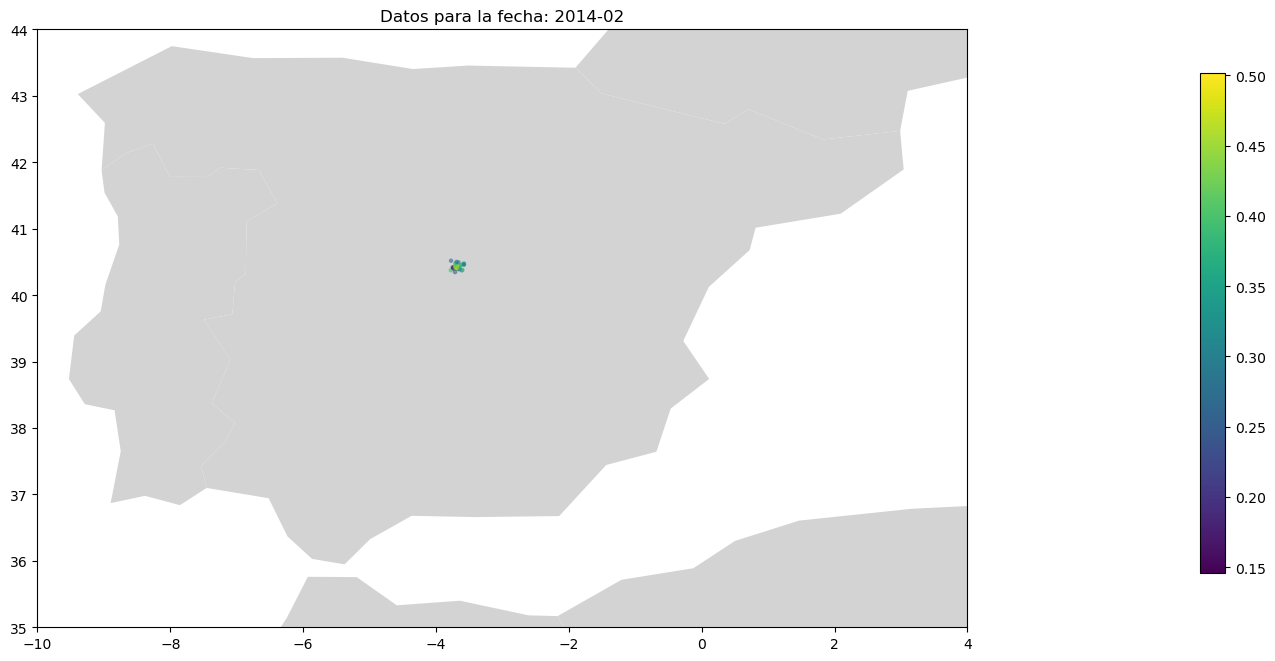

C:\Users\marcs\AppData\Local\Temp\ipykernel_17844\1249013810.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado.sort_values(by=['time', 'LATITUD', 'LONGITUD'], inplace=True)


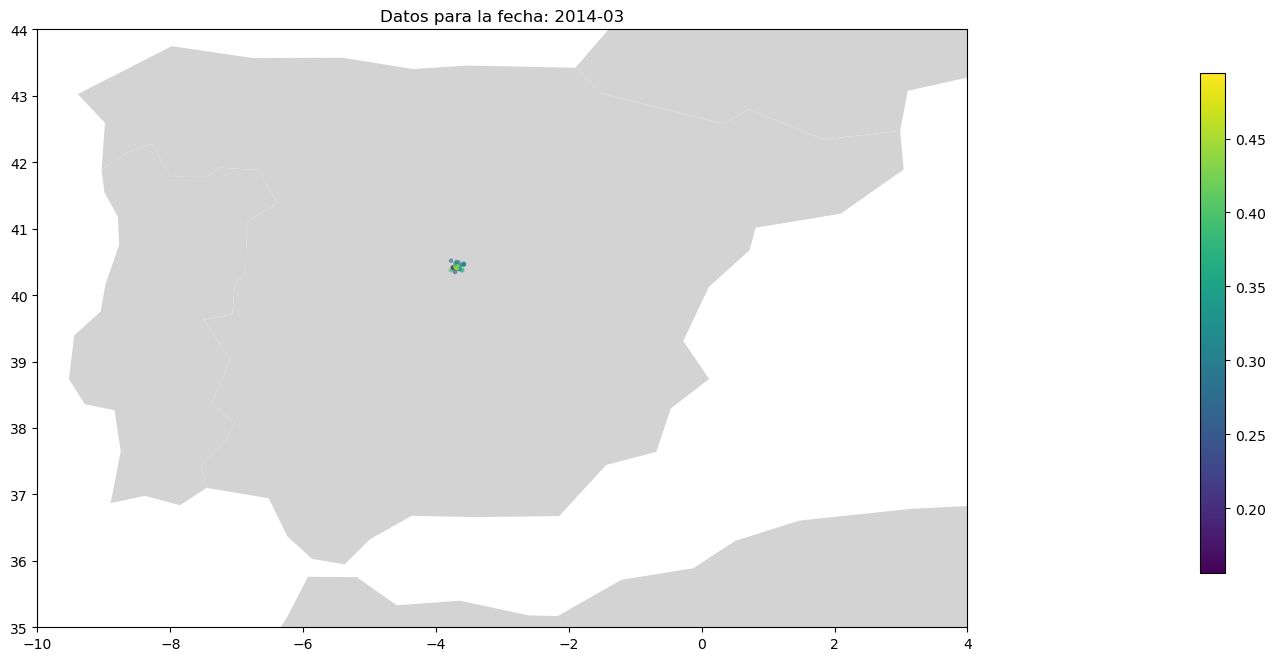

C:\Users\marcs\AppData\Local\Temp\ipykernel_17844\1249013810.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado.sort_values(by=['time', 'LATITUD', 'LONGITUD'], inplace=True)


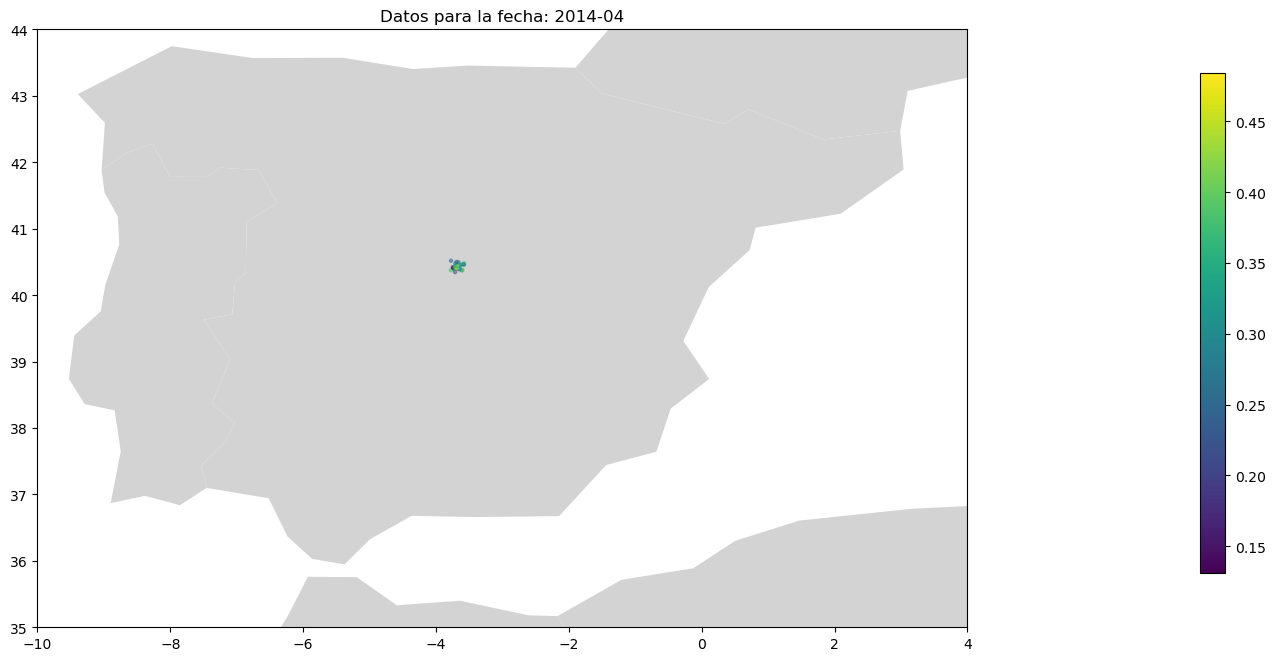

C:\Users\marcs\AppData\Local\Temp\ipykernel_17844\1249013810.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado.sort_values(by=['time', 'LATITUD', 'LONGITUD'], inplace=True)


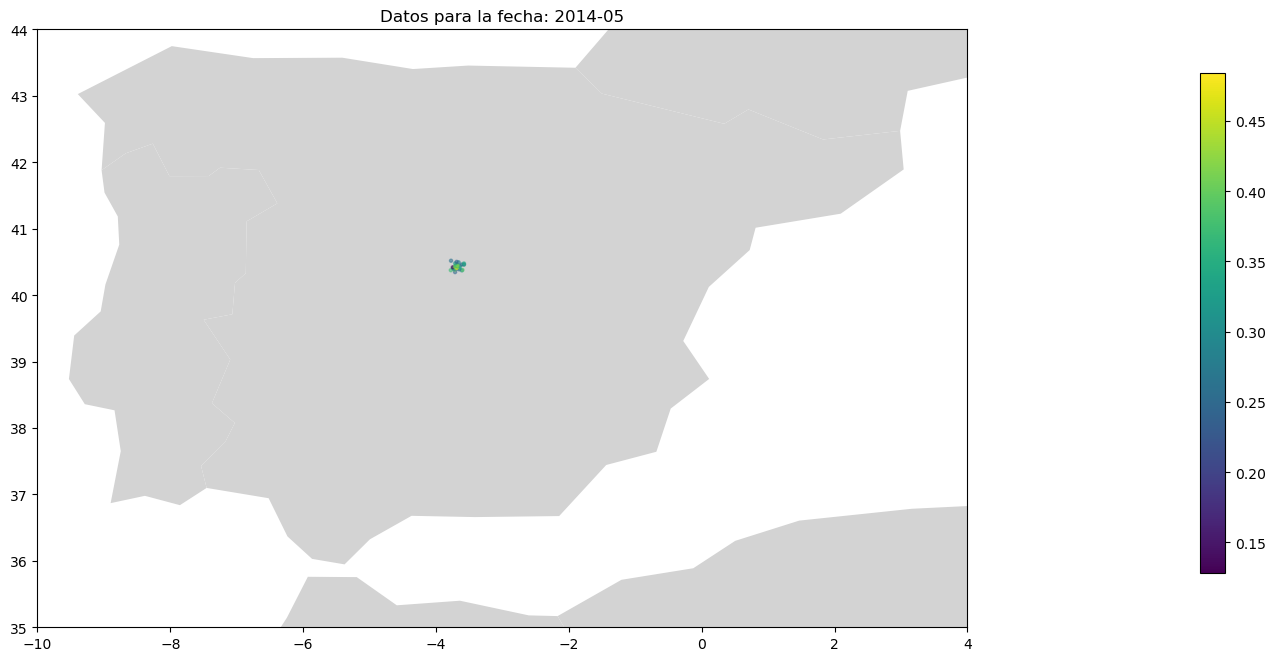

C:\Users\marcs\AppData\Local\Temp\ipykernel_17844\1249013810.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado.sort_values(by=['time', 'LATITUD', 'LONGITUD'], inplace=True)


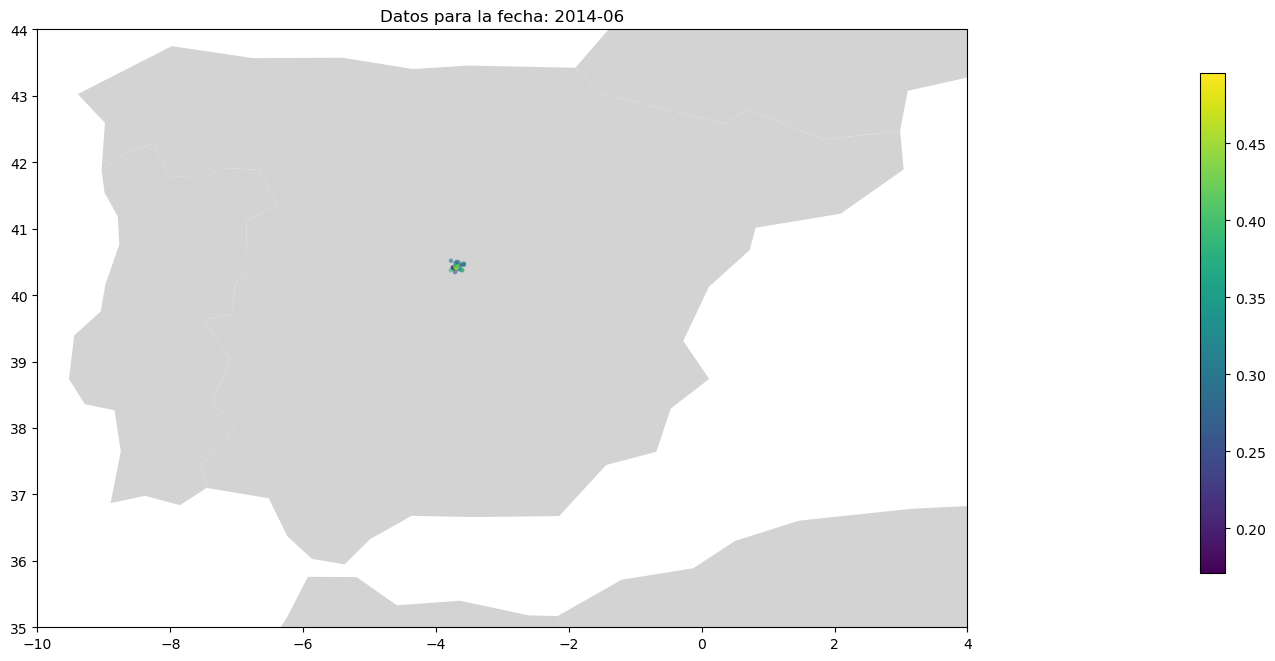

In [15]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Suponiendo que tu DataFrame 'df' ya está cargado y contiene una columna 'time' con fechas en formato de año y mes

# Crear el mapa base del mundo
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Fecha de inicio
fecha_inicial = pd.to_datetime('2014-01-01 00:00:00')

# Número de mapas a generar
num_mapas = 6

# Crear los mapas
for i in range(num_mapas):
    # Incrementar la fecha en un mes
    fecha_actual = fecha_inicial + pd.DateOffset(months=i)
    fecha_actual_str = fecha_actual.strftime('%Y-%m')  # Asegúrate de que el formato coincida con tu columna 'time'
    
    # Filtrar por la fecha actual
    df_filtrado = df[df['time'] == fecha_actual_str]
    df_filtrado.sort_values(by=['time', 'LATITUD', 'LONGITUD'], inplace=True)
    
    # Convertir el DataFrame filtrado a un GeoDataFrame
    gdf = gpd.GeoDataFrame(df_filtrado, geometry=gpd.points_from_xy(df_filtrado.LONGITUD, df_filtrado.LATITUD))
    
    # Crear el mapa y mostrar los datos con una leyenda para LAeq
    fig, ax = plt.subplots(figsize=(15, 10))
    world.plot(ax=ax, color='lightgrey')
    
    # Plotear los puntos con una escala de colores basada en LAeq
    if not gdf.empty:
        sc = gdf.plot(ax=ax, column='LAeq', cmap='viridis', markersize=5, legend=True, alpha=0.5)
    
    # Establecer límites del mapa para centrarse en España
    plt.xlim([-10, 4])
    plt.ylim([35, 44])
    
    plt.title(f'Datos para la fecha: {fecha_actual_str}')
    
    # Ajustar la leyenda
    if not gdf.empty:
        cax = fig.get_axes()[1]
        cax.set_position([0.9, 0.25, 0.03, 0.5])  # Ajustar la posición de la leyenda en el mapa
    
    plt.show()
